<h1> Analisys: N16-BodyProblem  (FCIRK-LQ h=3)</h1>

<ul id="top">
  <li><a href="#Initializations">Initializations</a></li>
  <li><a href="#Import-data">Import-data</a></li>
  <li><a href="#Get-Barycentric-Coordinates">Get-Barycentric-Coordinates</a></li>
  <li><a href="#Energy-error">Energy-error</a></li>
  <li><a href="#Position-error">Position-error</a></li>
  <li><a href="#Eccentricity-and-Semi-Major-Axis-error">Eccentricity-and-Semi-Major-Axis-error</a></li>    
  <li><a href="#Simulation">Simulation</a></li>  
</ul> 

<h2 id="Initializations">Initializations</h2>

In [1]:
using NBInclude
using Dates
using Plots
using DelimitedFiles
using Statistics

In [2]:
MYPATH="../../../Code/Julia/"
@nbinclude(string(MYPATH,"NBodyProblem.ipynb"))
@nbinclude(string(MYPATH,"C-Interfaces.ipynb"))
@nbinclude(string(MYPATH,"AuxiliarFunctions.ipynb"));

In [3]:
#Filenames
#Input
sol1="../Exact-Solution FCIRK16 (adaptive)/Data/outFCIRKqN16TY5.bin"
sol2="./Data/outFCIRKh3Y5.bin"
sol3="./Data/outFCIRKh3AdapY5.bin"

#Information of the experiment
experiment1="../Exact-Solution FCIRK16 (adaptive)/Data/expFCIRKh05TY5.txt"
experiment2="./Data/expFCIRKh3Y5.txt"
experiment3="./Data/expFCIRKh3Y5.txt";

In [4]:
planetslabels=["Sun" "Mercury" "Venus" "Mars" "Jupyter" "Saturn" "Uranus" "Neptune" "Pluto" "Ceres" "Pallas" "Vesta" "Iris" "Bamberga" "Earth" "Moon" ];
planetslabelsH=planetslabels[2:end];

In [5]:
#Plot parameters
# Title
MyTitle="FCIRK16:  h=3"
# Energy plots
Eaxa=-36
Eaxb=-18
# Position and velocity plots
axisya=-26
axisyb=-6;
#

<a href="#top">Back to the top</a>

<h2 id="Import-data">Import-data</h2>

In [6]:
f1=open(experiment1,"r")
expdata=readdlm(f1)
t0,tend,h1,nout1,neq=expdata
nout1=Integer(nout1)  # convert to Integer
neq=Integer(neq)    # convert to Integer
close(f1)
(h1,nout1,neq,tend)

(0.5, 251, 90, 1.83e7)

In [7]:
f1=open(experiment2,"r");
expdata=readdlm(f1);
t0,tend,h2,nout2,neq=expdata
nout2=Integer(nout2)  # convert to Integer
neq=Integer(neq)    # convert to Integer
close(f1)
(h2,nout2,tend)

(3.0, 251, 1.83e7)

In [8]:
f3=open(experiment3,"r")
expdata=readdlm(f3)
t0,tend,h3,nout3,neq=expdata
nout3=Integer(nout3)  # convert to Integer
neq=Integer(neq)    # convert to Integer
close(f3)
(h3,nout3,tend)

(3.0, 251, 1.83e7)

In [9]:
t1,solU1=Readbin(nout1,neq,sol1)
t2,solU2=Readbin(nout2,neq,sol2)
t3,solU3=Readbin(nout3,neq,sol3)
#ti=t2;
ti=round.(t2./365.25)
nout=nout2;

In [10]:
# Grafikoen x-ardatzean azken zifra ondo ikusteko
#tendx=tend+40000;
tendx=tend./365.25+1000;

In [11]:
# Check if they are same initial conditions
(norm(solU1[1]-solU2[1]),norm(solU1[1]-solU3[1]))

(0.0, 0.0)

In [12]:
(t0,tend,nout2,size(t1),neq)

(0.0, 1.83e7, 251, (251,), 90)

In [13]:
k=2
[ti[k],t1[k],t2[k],t3[k]]

4-element Array{BigFloat,1}:
   200.0
 73200.0
 73200.0
 73200.0

<a href="#top">Back to the top</a>

<h2 id"Get-Barycentric-Coordinates">Get-Barycentric-Coordinates</h2>

Convert data from Heliocentric canonical coordinates to Barycentric-Coordinates 

In [14]:
(nbody,u0,k,Gm,iE,iM)= N16_Initial_Values()
dim=3
neq=nbody*2*dim
d=Int(neq/2)
nbodyH=nbody-1;

In [15]:
solu1=ChangeHeltoBar(solU1,Gm,ti,nbodyH)
solu2=ChangeHeltoBar(solU2,Gm,ti,nbodyH)
solu3=ChangeHeltoBar(solU3,Gm,ti,nbodyH)
#
qq1=[u[2:d+1] for u in solu1]
vv1=[u[d+2:end] for u in solu1]
qq2=[u[2:d+1] for u in solu2]
vv2=[u[d+2:end] for u in solu2]
qq3=[u[2:d+1] for u in solu3]
vv3=[u[d+2:end] for u in solu3];

<a href="#top">Back to the top</a>

<h2 id="Energy-error">Energy-error</h2>

In [16]:
now()

2021-03-30T21:06:19.291

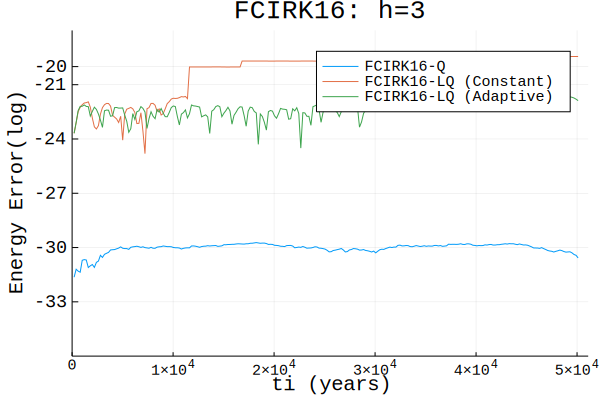

In [17]:
setprecision(BigFloat, 256)

E0=NBodyHam(neq,BigFloat.(solu1[1]),BigFloat.(Gm))
ΔE1 = map(x->NBodyHam(neq,BigFloat.(x),BigFloat.(Gm)), solu1)./E0.-1
ΔE2 = map(x->NBodyHam(neq,BigFloat.(x),BigFloat.(Gm)), solu2)./E0.-1
ΔE3 = map(x->NBodyHam(neq,BigFloat.(x),BigFloat.(Gm)), solu3)./E0.-1

plot(ti,log10.(abs.(ΔE1)), label="FCIRK16-Q")
plot!(ti, log10.(abs.(ΔE2)), label="FCIRK16-LQ (Constant)")
plot!(ti, log10.(abs.(ΔE3)), label="FCIRK16-LQ (Adaptive)")
plot!(title=MyTitle,
      xlabel="ti (years)",
      ylabel="Energy Error(log)",
      xlims=(0,tendx),
      ylims=(Eaxa,Eaxb),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

<a href="#top">Back to the top</a>

<h2 id="Position-error">Position-error</h2>

In [18]:
qerr2=ListRelDist(qq1,qq2)
verr2=ListRelDist(vv1,vv2)
qerr3=ListRelDist(qq1,qq3)
verr3=ListRelDist(vv1,vv3);

In [19]:
transpose([nbody,nout,size(ti)[1],size(qerr2)[1],size(qerr2)[end]])

1×5 Transpose{Int64,Array{Int64,1}}:
 16  251  251  251  251

In [20]:
q_vect2,v_vect2=DataToPlot(qerr2,verr2)
q_vect3,v_vect3=DataToPlot(qerr3,verr3);

<a href="#top">Back to the top</a>

<h3 id="FCIRK-LQ-Method-Constant">FCIRK-LQ-Method-Constant</h3>

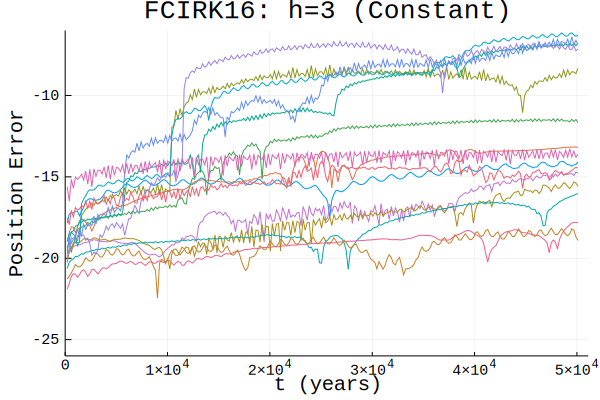

In [21]:
xx=map(x->log10.(abs.(x)),q_vect2[2:end]);
plot(ti,xx,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Constant)"),
      xlabel="t (years)",
      ylabel="Position Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier")

)

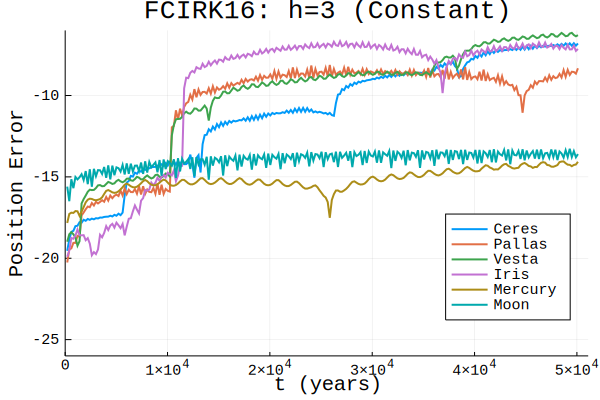

In [22]:
xx=map(x->log10.(abs.(x)),q_vect2[10:13])
plot(ti,xx, lw=2,label=["Ceres" "Pallas" "Vesta" "Iris"])
xx=map(x->log10.(abs.(x)),q_vect2[2])
plot!(ti,xx,lw=2, label="Mercury")
xx=map(x->log10.(abs.(x)),q_vect2[16])
plot!(ti,xx,lw=2, label="Moon")
plot!(title=string(MyTitle," (Constant)"),
      xlabel="t (years)",
      ylabel="Position Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier"),
      legend=:bottomright    

)

In [25]:
savefig("./Figures/Fig6a.pdf")

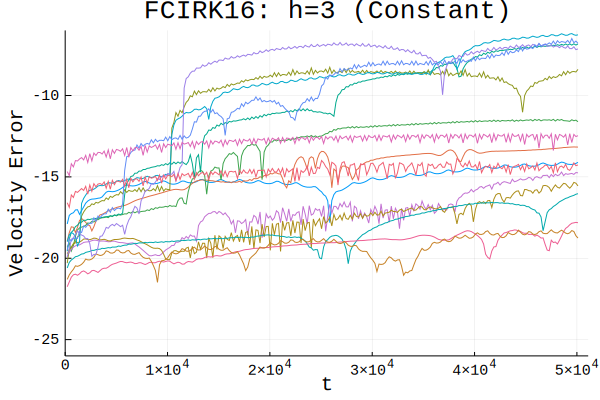

In [23]:
vv=map(x->log10.(abs.(x)),v_vect2[2:end]);
plot(ti,vv,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Constant)"),
      xlabel="t",
      ylabel="Velocity Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier"),
)

<h3 id="FCIRK-LQ-Method-Adaptive">FCIRK-LQ-Method-Adaptive</h3>

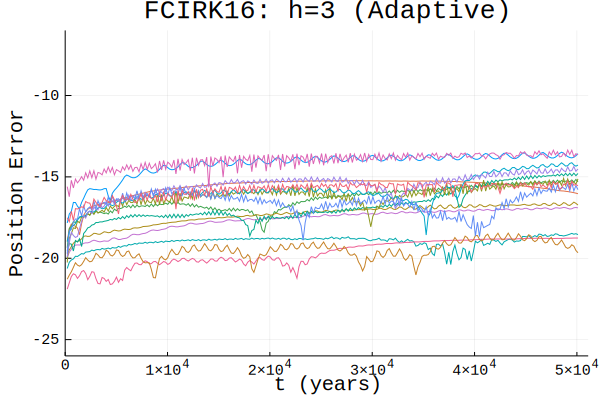

In [24]:
xx=map(x->log10.(abs.(x)),q_vect3[2:end]);
plot(ti,xx,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Adaptive)"),
      xlabel="t (years)",
      ylabel="Position Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier")
)

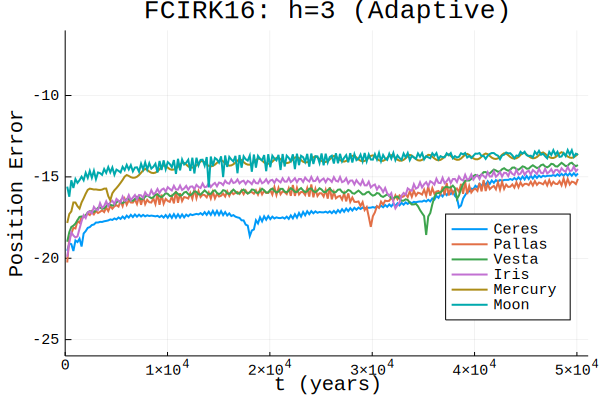

In [25]:
xx=map(x->log10.(abs.(x)),q_vect3[10:13])
plot(ti,xx,lw=2, label=["Ceres" "Pallas" "Vesta" "Iris"])
xx=map(x->log10.(abs.(x)),q_vect3[2])
plot!(ti,xx, lw=2, label="Mercury")
xx=map(x->log10.(abs.(x)),q_vect3[16])
plot!(ti,xx, lw=2, label="Moon")
plot!(title=string(MyTitle," (Adaptive)"),
      xlabel="t (years)",
      ylabel="Position Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier"),
      legend=:bottomright
)

In [29]:
savefig("./Figures/Fig6b.pdf")

### Comparison-between-methods

In [52]:
q_vect32=Vector{Vector{BigFloat}}(undef,nbody)
v_vect32=Vector{Vector{BigFloat}}(undef,nbody)

for i in 1:nbody
     q_vect32[i]=q_vect3[i]./q_vect2[i]
     v_vect32[i]=v_vect3[i]./v_vect2[i]
end

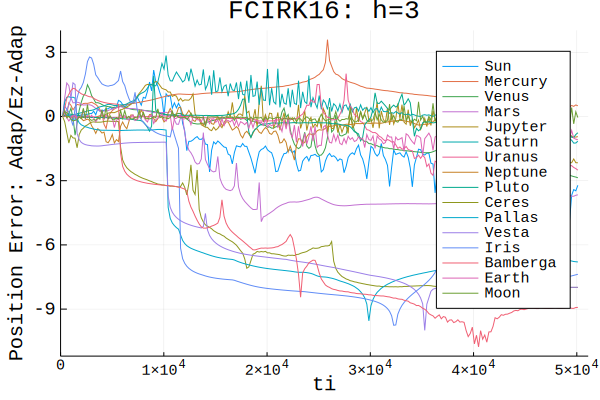

In [53]:
xx=map(x->log10.(x),(map(x->abs.(x),q_vect32)))
plot(ti,xx,label=planetslabels)
plot!(title=MyTitle,
      xlabel="ti",
      ylabel="Position Error: Adap/Ez-Adap",
      xlims=(0,tendx),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

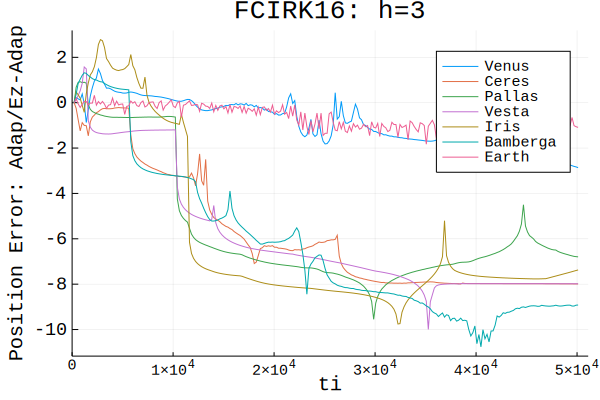

In [54]:
xx=map(x->log10.(x),(map(x->abs.(x),q_vect32)))
plot(ti,xx[3], labels="Venus") #label=planetslabels)
plot!(ti,xx[10], labels="Ceres")
plot!(ti,xx[11], labels="Pallas")
plot!(ti,xx[12], labels="Vesta")
plot!(ti,xx[13], labels="Iris")
plot!(ti,xx[14], labels="Bamberga")
plot!(ti,xx[15], labels="Earth")
plot!(title=MyTitle,
      xlabel="ti",
      ylabel="Position Error: Adap/Ez-Adap",
      xlims=(0,tendx),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

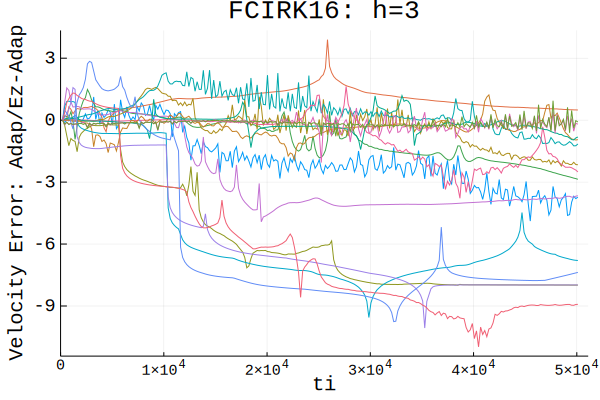

In [55]:
xx=map(x->log10.(x),(map(x->abs.(x),v_vect32)));
plot(ti,xx, labels="") #label=planetslabels)
plot!(title=MyTitle,
      xlabel="ti",
      ylabel="Velocity Error: Adap/Ez-Adap",
      xlims=(0,tendx),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

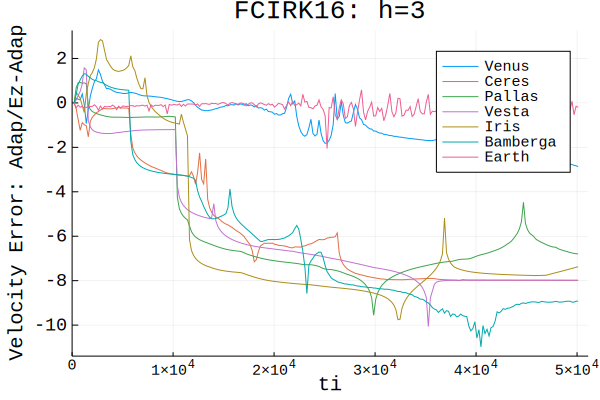

In [56]:
xx=map(x->log10.(x),(map(x->abs.(x),v_vect32)));
plot(ti,xx[3], labels="Venus") #label=planetslabels)
plot!(ti,xx[10], labels="Ceres")
plot!(ti,xx[11], labels="Pallas")
plot!(ti,xx[12], labels="Vesta")
plot!(ti,xx[13], labels="Iris")
plot!(ti,xx[14], labels="Bamberga")
plot!(ti,xx[15], labels="Earth")
plot!(title=MyTitle,
      xlabel="ti",
      ylabel="Velocity Error: Adap/Ez-Adap",
      xlims=(0,tendx),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

<a href="#top">Back to the top</a>

## Eccentricity-and-Semi-Major-Axis-error

In [28]:
mu=copy(k)
sun=parse(BigFloat,"0.295912208285591100e-3")
earth=parse(BigFloat,"0.888769244512563400e-9")
moon=parse(BigFloat,"0.109318945074237400e-10")
mu[end-1]=(earth+moon)+sun 
mu[end]=moon+earth
mu[end]=earth^3/(earth+moon)^2
axis1=map(x->KeplerAList(x,mu),solU1)
axis2=map(x->KeplerAList(x,mu),solU2)
axis3=map(x->KeplerAList(x,mu),solU3)
ecc1=map(x->KeplerEList(x,mu),solU1)
ecc2=map(x->KeplerEList(x,mu),solU2)
ecc3=map(x->KeplerEList(x,mu),solU3)

axis1_v,ecc1_v=DataToPlot(axis1,ecc1)
axis2_v,ecc2_v=DataToPlot(axis2,ecc2)
axis3_v,ecc3_v=DataToPlot(axis2,ecc3);

In [29]:
mean(ecc1[:,1]);

In [37]:
# Kalkuluak zuzenak diren jakiteko 
# liburu batetik datu hauek jaso ditut

#             Semi-major-axis     Ecc
#  Mercury:   0.38710             0.205631
#  Venus:     0.72333             0.006773
#  Earth      1.00000             0.01671
#  Mars       1,52366             0.093412
#  Jupiter    5.20336             0.048393
#  Saturn     9.53707             0.054151
#  Uranus     19.1913             0.047168
#  Neptuno    30.0690             0.008586
#  Moon                           0.0549


In [30]:
Aerr12=ListRelErr(axis1,axis2);
Aerr13=ListRelErr(axis1,axis3);
Eerr12=ListRelErr(ecc1,ecc2);
Eerr13=ListRelErr(ecc1,ecc3);

Aerr12_v,Eerr12_v=DataToPlot(Aerr12,Eerr12);
Aerr13_v,Eerr13_v=DataToPlot(Aerr13,Eerr13);

### Semi-Major-Axis (FCIRK-LQ Constant)

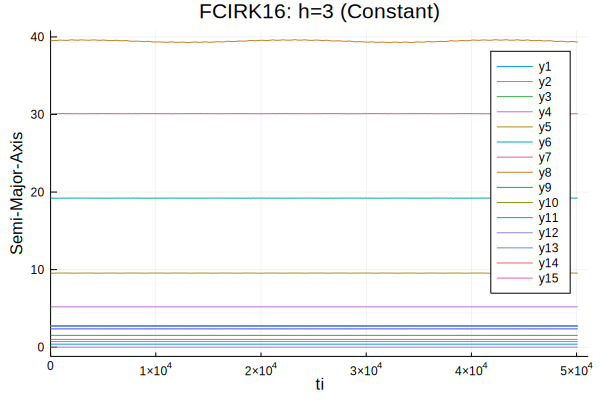

In [31]:
plot(ti,axis2_v) #label=planetslabelsH)
plot!(title=string(MyTitle," (Constant)"),
      xlabel="ti",
      ylabel="Semi-Major-Axis",
#      ylims=(axisya,axisyb),
      xlims=(0,tendx),
)

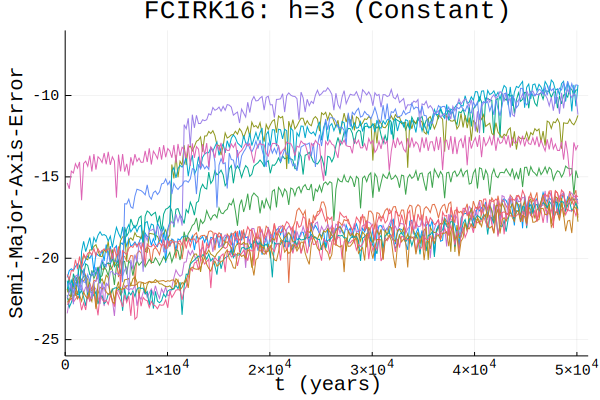

In [33]:
xx=map(x->log10.(x),(map(x->abs.(x),Aerr12_v)));
plot(ti,xx,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Constant)"),
xlabel="t (years)",
ylabel="Semi-Major-Axis-Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier")
)

### Semi-Major-Axis (FCIRK-LQ Adaptive)

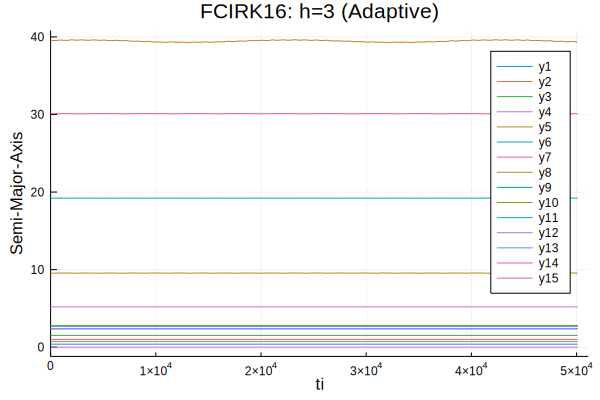

In [34]:
plot(ti,axis3_v) #label=planetslabelsH)
plot!(title=string(MyTitle," (Adaptive)"),
      xlabel="ti",
      ylabel="Semi-Major-Axis",
#      ylims=(axisya,axisyb),
      xlims=(0,tendx),
)

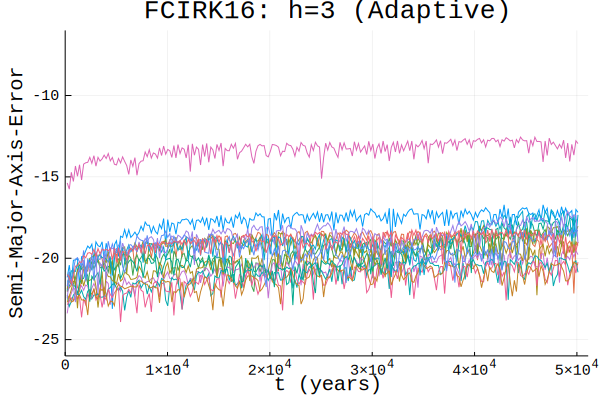

In [35]:
xx=map(x->log10.(x),(map(x->abs.(x),Aerr13_v)));
plot(ti,xx,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Adaptive)"),
xlabel="t (years)",
ylabel="Semi-Major-Axis-Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier")
)

### Eccentricity (FCIRK-LQ Constant)

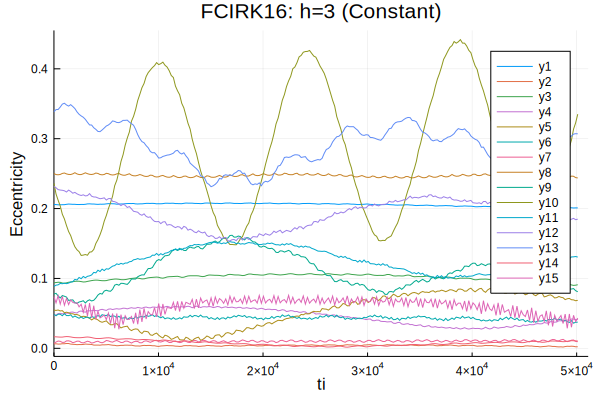

In [36]:
plot(ti,ecc2_v) #label=planetslabelsH)
plot!(title=string(MyTitle," (Constant)"),
      xlabel="ti",
      ylabel="Eccentricity",
#      ylims=(axisya,axisyb),
      xlims=(0,tendx),
)

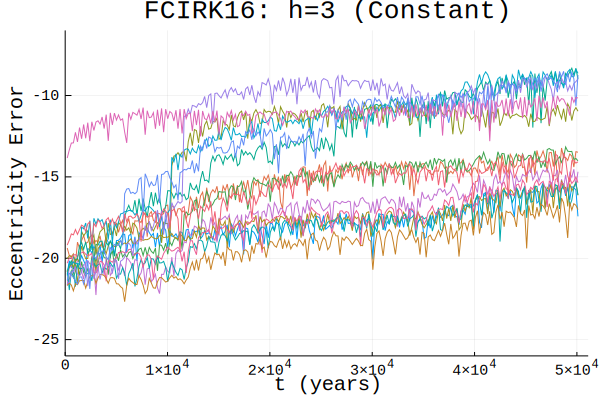

In [37]:
xx=map(x->log10.(x),(map(x->abs.(x),Eerr12_v)));
plot(ti,xx,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Constant)"),
xlabel="t (years)",
ylabel="Eccentricity Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier")
)

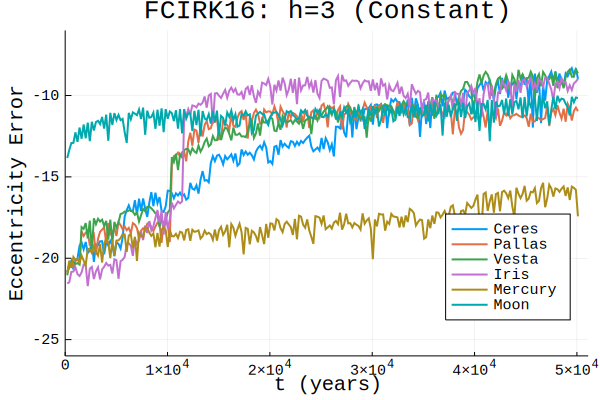

In [38]:
xx=map(x->log10.(abs.(x)),Eerr12_v[9:12]);
plot(ti,xx, lw=2, label=["Ceres" "Pallas" "Vesta" "Iris"])
xx=map(x->log10.(abs.(x)),Eerr12_v[1]);
plot!(ti,xx, lw=2, label="Mercury")
#xx=map(x->log10.(abs.(x)),Eerr12_v[14:15]);
#plot!(ti,xx,label=["Earth" "Moon"])
xx=map(x->log10.(abs.(x)),Eerr12_v[15]);
plot!(ti,xx,lw=2, label="Moon")
plot!(title=string(MyTitle," (Constant)"),
      xlabel="t (years)",
      ylabel="Eccentricity Error",
      ylims=(axisya,axisyb),
      xlims=(0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier"),
      legend=:bottomright
)

In [46]:
savefig("./Figures/Fig7a.pdf")

### Eccentricity (FCIRK-LQ Adaptive)

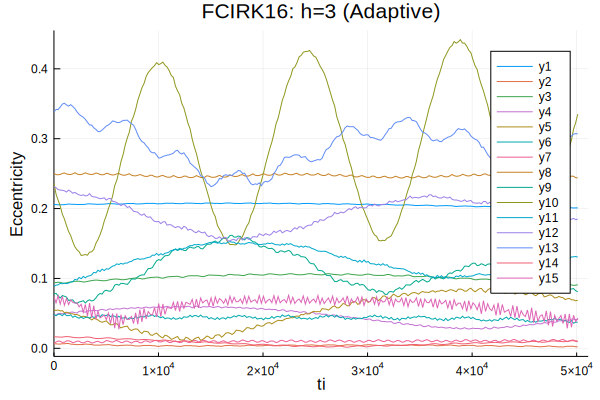

In [39]:
plot(ti,ecc3_v) #label=planetslabelsH)
plot!(title=string(MyTitle," (Adaptive)"),
      xlabel="ti",
      ylabel="Eccentricity",
#      ylims=(axisya,axisyb),
      xlims=(0,tendx),
)

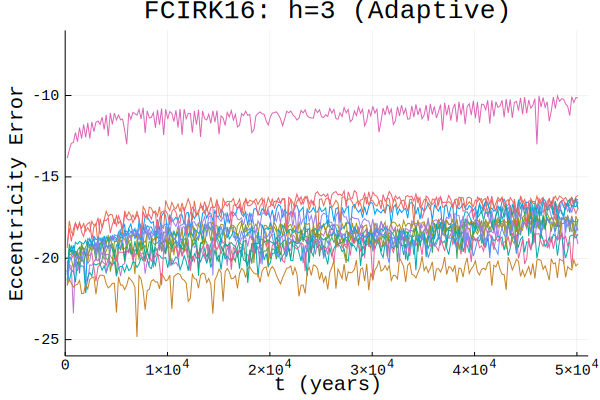

In [40]:
xx=map(x->log10.(x),(map(x->abs.(x),Eerr13_v)));
plot(ti,xx,label="") #planetslabelsH)
plot!(title=string(MyTitle," (Adaptive)"),
xlabel="t (years)",
ylabel="Eccentricity Error",
      ylims=(axisya,axisyb),
      xlims=(t0,tendx),
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier")
)

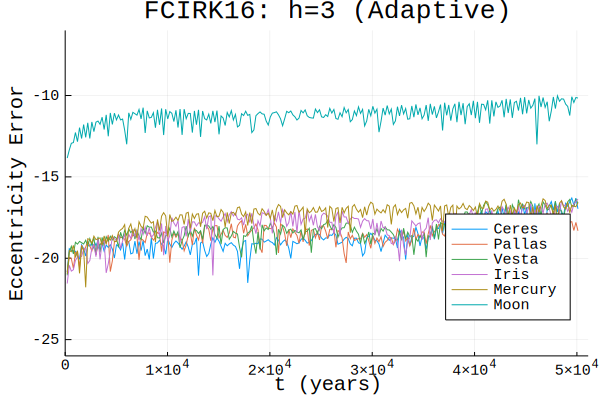

In [49]:
xx=map(x->log10.(abs.(x)),Eerr13_v[9:12]);
plot(ti,xx,label=["Ceres" "Pallas" "Vesta" "Iris"])
xx=map(x->log10.(abs.(x)),Eerr13_v[1]);
plot!(ti,xx,label="Mercury")
#xx=map(x->log10.(abs.(x)),Eerr12_v[14:15]);
#plot!(ti,xx,label=["Earth" "Moon"])
xx=map(x->log10.(abs.(x)),Eerr13_v[15]);
plot!(ti,xx,label="Moon")
plot!(title=string(MyTitle," (Adaptive)"),
      xlabel="t (years)",
      ylabel="Eccentricity Error",
      ylims=(axisya,axisyb),
      xlims=(0,tendx),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
#      ytickfont = font(10, "Courier")
      ytickfont = font(8, "Courier"),
      xtickfont = font(8, "Courier"),
     legend=:bottomright
)

In [50]:
savefig("./Figures/Fig7b.pdf")

<a href="#top">Back to the top</a>

# Simulation

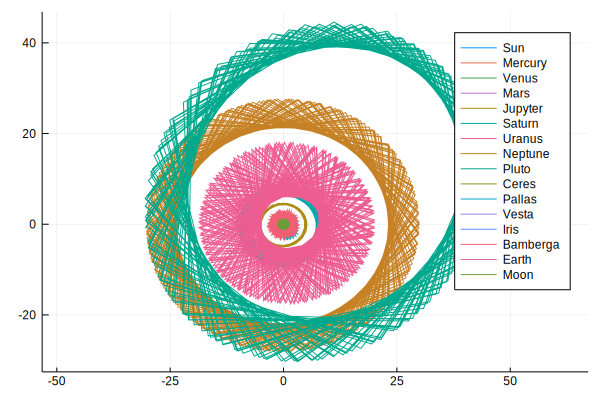

In [41]:
xlist = map(u -> u[1], qq2)
ylist = map(u -> u[2], qq2)
plt=plot(xlist,ylist, aspect_ratio=1,label=planetslabels)
for k  in 1:(nbody-1)
  xlist = map(u -> u[k*3+1], qq2)
  ylist = map(u -> u[k*3+2], qq2)
    plot!(xlist,ylist, aspect_ratio=1,label=planetslabels[k+1])
end  
display(plt)

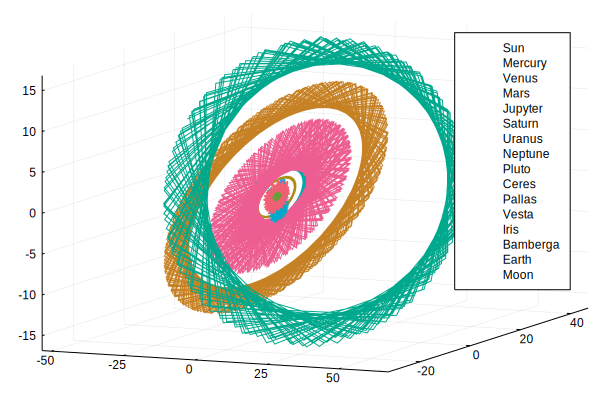

In [52]:
xlist = map(u -> u[1], qq2)
ylist = map(u -> u[2], qq2)
zlist = map(u -> u[3], qq2)
plt=plot(xlist,ylist,zlist, aspect_ratio=1,label=planetslabels)
for k  in 1:(nbody-1)
  xlist = map(u -> u[k*3+1], qq2)
  ylist = map(u -> u[k*3+2], qq2)
  zlist = map(u -> u[k*3+3], qq2)
    plot!(xlist,ylist,zlist, aspect_ratio=1,label=planetslabels[k+1])
end  
display(plt)

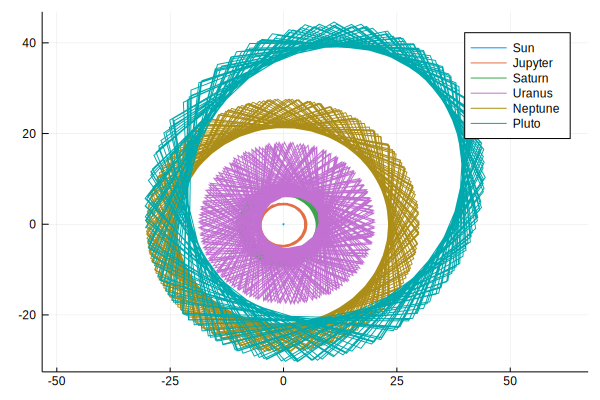

In [53]:
#Outer Planets
xbodies=[4,5,6,7,8]
xlist = map(u -> u[1], qq2)
ylist = map(u -> u[2], qq2)
plt=plot(xlist,ylist, aspect_ratio=1,label=planetslabels)
for k  in xbodies
  xlist = map(u -> u[k*3+1], qq2)
  ylist = map(u -> u[k*3+2], qq2)
    plot!(xlist,ylist, aspect_ratio=1,label=planetslabels[k+1])
end  
display(plt)

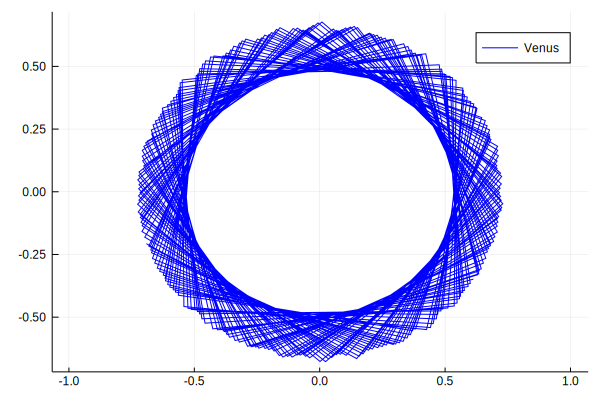

In [54]:
k=2
xlist = map(u -> u[k*3+1], qq2)
ylist = map(u -> u[k*3+2], qq2)
plot(xlist,ylist, aspect_ratio=1,label=planetslabels[k+1],color = :blue)

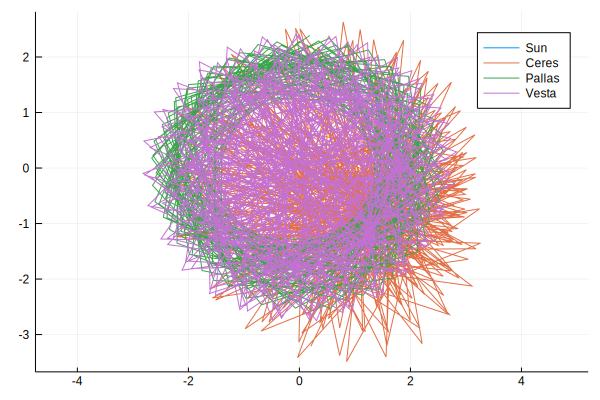

In [55]:
#Asteroids
xbodies=[10,11,12]
xlist = map(u -> u[1], qq2)
ylist = map(u -> u[2], qq2)
plt=plot(xlist,ylist, aspect_ratio=1,label=planetslabels[1])
for k  in xbodies
  xlist = map(u -> u[k*3+1], qq2)
  ylist = map(u -> u[k*3+2], qq2)
  plot!(xlist,ylist, aspect_ratio=1,label=planetslabels[k])
end  
display(plt)